In [1]:
# Spark
# import pyspark
from pyspark import SparkConf,SparkContext
# try:
#     sc.stop()
# except:
#     pass
# conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
# sc = SparkContext(conf=conf).getOrCreate()
# # Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
data = sc.textFile('/Users/dzzxjl/data/NYC/train.csv')

In [6]:
data.first()

'id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration'

In [7]:
data.top(5)

['id4000000,2,2016-03-12 22:11:02,2016-03-12 22:27:51,1,-73.977371215820313,40.764621734619141,-73.9864501953125,40.756881713867188,N,1009',
 'id3999999,2,2016-03-15 07:14:21,2016-03-15 07:26:22,1,-74.007614135742187,40.732471466064453,-73.98529052734375,40.760105133056641,N,721',
 'id3999998,2,2016-01-22 15:25:13,2016-01-22 15:49:00,1,-73.9822998046875,40.76837158203125,-73.952491760253906,40.817390441894531,N,1427',
 'id3999992,2,2016-05-20 14:05:31,2016-05-20 14:07:49,1,-73.971343994140625,40.787361145019531,-73.97802734375,40.778385162353516,N,138',
 'id3999988,2,2016-05-23 17:37:28,2016-05-23 18:28:33,1,-73.99932861328125,40.724830627441406,-74.177017211914063,40.694900512695313,N,3065']

In [8]:
data.count()

1458645

In [18]:
data = spark.read.format("csv").option("header","true").csv('/Users/dzzxjl/data/NYC/train.csv')

In [19]:
data

DataFrame[id: string, vendor_id: string, pickup_datetime: string, dropoff_datetime: string, passenger_count: string, pickup_longitude: string, pickup_latitude: string, dropoff_longitude: string, dropoff_latitude: string, store_and_fwd_flag: string, trip_duration: string]

In [20]:
data.count()

1458644

In [23]:
# 展示数据
data.show()

+---------+---------+-------------------+-------------------+---------------+-------------------+------------------+-------------------+------------------+------------------+-------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|   pickup_longitude|   pickup_latitude|  dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+-------------------+------------------+-------------------+------------------+------------------+-------------+
|id2875421|        2|2016-03-14 17:24:55|2016-03-14 17:32:30|              1|-73.982154846191406|40.767936706542969|-73.964630126953125|40.765602111816406|                 N|          455|
|id2377394|        1|2016-06-12 00:43:35|2016-06-12 00:54:38|              1|-73.980415344238281|40.738563537597656|-73.999481201171875|40.731151580810547|                 N|          663|
|id3858529|        2|2016-01-19 11:35:24|2016-01-19 12:

In [24]:
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- vendor_id: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- trip_duration: string (nullable = true)



In [26]:
data.filter(data['trip_duration'] > 500).show()

+---------+---------+-------------------+-------------------+---------------+-------------------+------------------+-------------------+------------------+------------------+-------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|   pickup_longitude|   pickup_latitude|  dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+-------------------+------------------+-------------------+------------------+------------------+-------------+
|id2377394|        1|2016-06-12 00:43:35|2016-06-12 00:54:38|              1|-73.980415344238281|40.738563537597656|-73.999481201171875|40.731151580810547|                 N|          663|
|id3858529|        2|2016-01-19 11:35:24|2016-01-19 12:10:48|              1|-73.979026794433594|40.763938903808594|-74.005332946777344|40.710086822509766|                 N|         2124|
|id1324603|        2|2016-05-21 07:54:58|2016-05-21 08:

In [36]:
# data['pickup_longitude'].top()
longitude = data.select('pickup_longitude').collect()
latitude = data.select('pickup_latitude').collect()

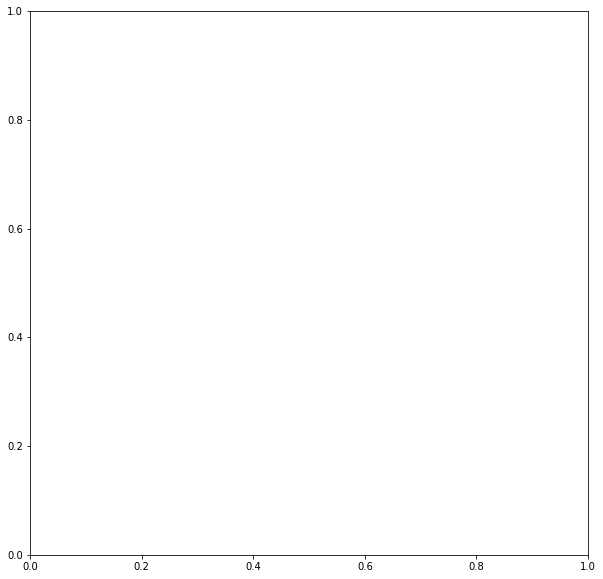

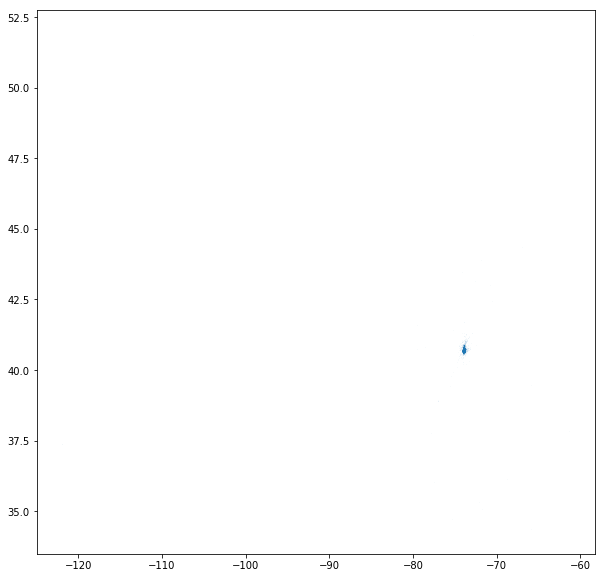

In [37]:
plt.figure(figsize = (10,10))
plt.plot(longitude, latitude, '.', alpha = 0.4, markersize = 0.05)
plt.show()

In [2]:
sc.stop()